# Groundwaterlevels
Script written by: Emma Kok \
This script shows the groundwaterlevels of the different locations of the NOBV


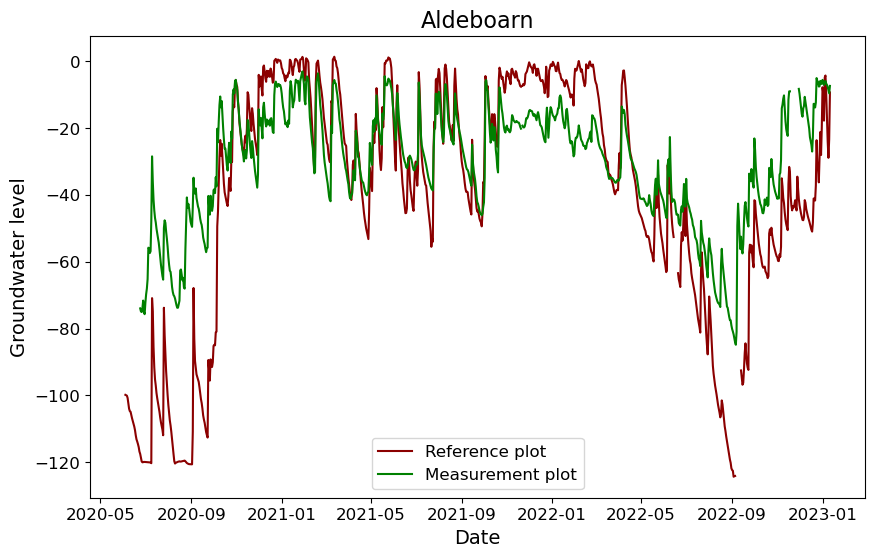

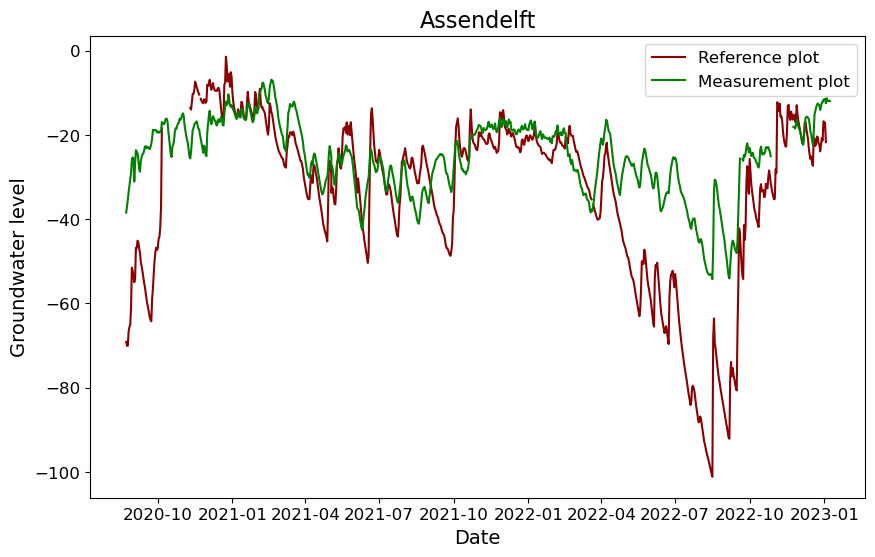

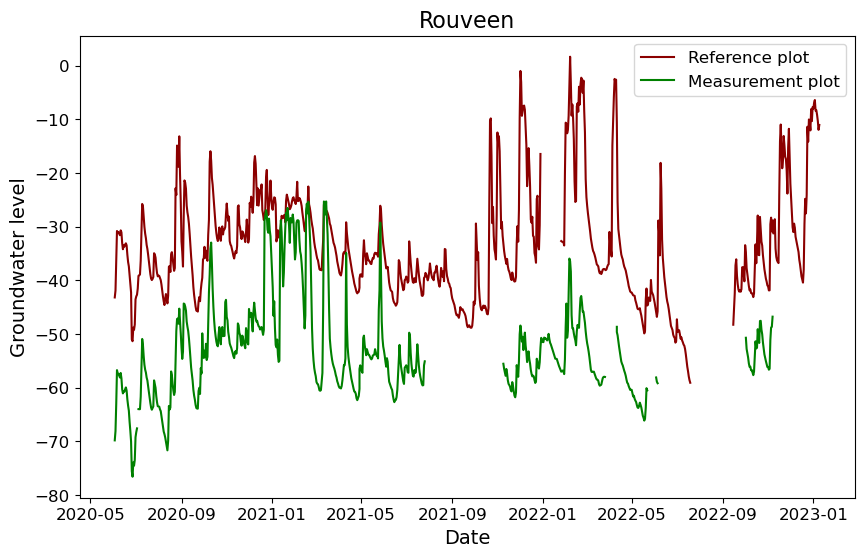

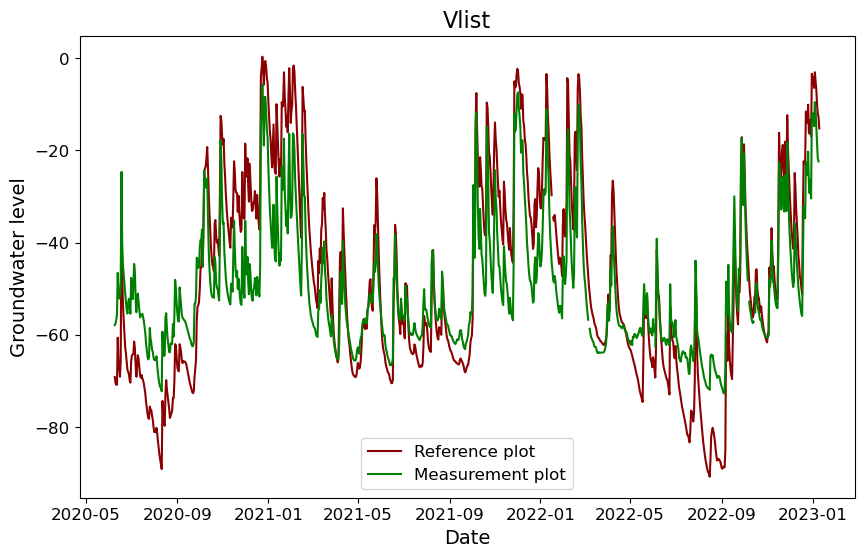

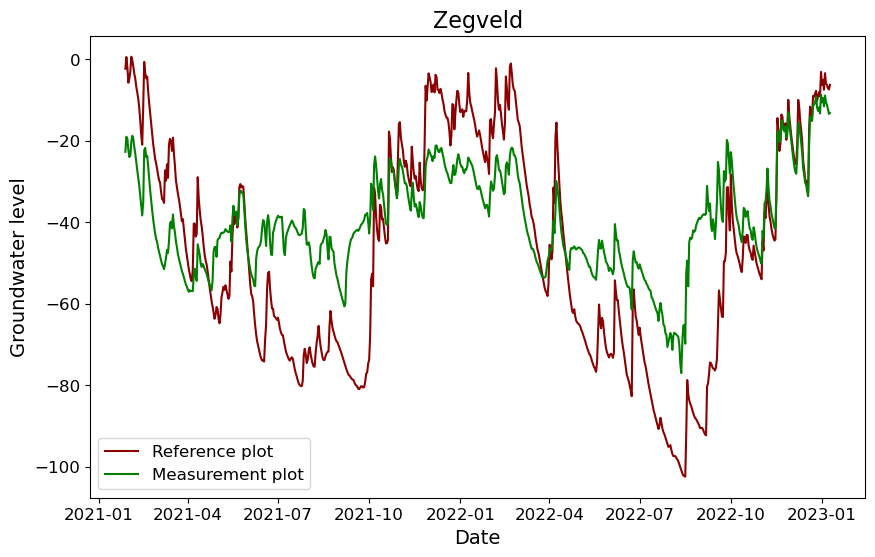

In [1]:
# Import different packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Import all the different csv files of the measured groundwaterlevels
input_ALB_ref = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_ALBRF.csv")
input_ALB_meas = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_ALBMS.csv")

input_ASD_ref = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_ASDRF.csv")
input_ASD_meas = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_ASDMP.csv")
input_ASD_meas = input_ASD_meas.iloc[:-2]

input_ROU_ref = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_ROVRF.csv")
input_ROU_meas = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_ROVMS.csv")

input_VLIST_ref = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_VLIRF.csv")
input_VLIST_meas = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_VLIMS.csv")

input_ZEG_ref = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_ZEGRF16.csv")
input_ZEG_meas = pd.read_csv(r"C:\Users\Kok30\OneDrive - Waternet Amsterdam\Documents\Corrected_WTD_measurements_NOBV\GW_srfd_ZEGMP16.csv")

# Define the location names
location_names = {
    'ALB': 'Aldeboarn',
    'ASD': 'Assendelft',
    'ROU': 'Rouveen',
    'VLIST': 'Vlist',
    'ZEG': 'Zegveld'
}

# Define a dictionary with the input datasets
input_data = {
    'ALB': {'ref': input_ALB_ref, 'meas': input_ALB_meas},
    'ASD': {'ref': input_ASD_ref, 'meas': input_ASD_meas},
    'ROU': {'ref': input_ROU_ref, 'meas': input_ROU_meas},
    'VLIST': {'ref': input_VLIST_ref, 'meas': input_VLIST_meas},
    'ZEG': {'ref': input_ZEG_ref, 'meas': input_ZEG_meas}
}

# Loop over the input datasets
for location, data in input_data.items():
    # Select the desired columns from the dataframes
    df_meas_selected = data['meas'][['date', 'WLEV1']]
    df_ref_selected = data['ref'][['date', 'WLEV1']]

    # Merging the dataframes based on the "date" column
    merged_df = pd.merge(df_ref_selected, df_meas_selected, on='date', how='outer')

    # Renaming the columns
    merged_df.columns = ['date', 'WLEV1_ref', 'WLEV1_meas']
    merged_df['date'] = pd.to_datetime(merged_df['date'])

    # Plotting the data
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(merged_df['date'], merged_df['WLEV1_ref'], label='Reference plot', color='darkred')
    ax.plot(merged_df['date'], merged_df['WLEV1_meas'], label='Measurement plot', color='green')
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Groundwater levels relative to ground surface [cm]', fontsize=14)
    ax.set_title(location_names[location], fontsize=16)
    ax.set_ylim(-120, 5) 

    # Increase font sizes
    ax.tick_params(axis='both', which='major', labelsize=12)
    leg = ax.legend(fontsize=12)
    for text in leg.get_texts():
        text.set_fontsize(12)

    # Save + show the figure
    plt.savefig(f"{location}_GWlevels.pdf")
    plt.show()
